### Adaboost
* Implemented from scratch
* @ Ramendra Kumar

#### Algorithm: Steps
* Each Sample/instance Weight is set equal to (1/m).  --> m = number of sample in data set(in code 'n' is used).
* A first Predictor (Weak learner) is trained and its weighted error rate  is computed on the training set as given in Eqn1.Note first preictor is a tree with just two leafs and one node also called a stump.
* The predictor's weight 'alpha' is then computed using Eqn2.
* Instance weights are updated using Eqn3.
* Instance weights are Normalized. Note this is not implemented after Eqn3.It is automatically implemented inside Decision Tree 'fit' method with weights.
* Finally, a new predictor is trained using updated weights and the whole process is repeated.The algorithm stops when when desired number of predictors is reached.
* To make predictions, Adaboost simply computes the predictions of all the predictors and weighs them using the predictor weights 'alpha' . The predicted class is the one that receives the majority of weighted votes. Implemented in Eqn4.

#### 1. Weighted  Error of the  Estimator/Predictor
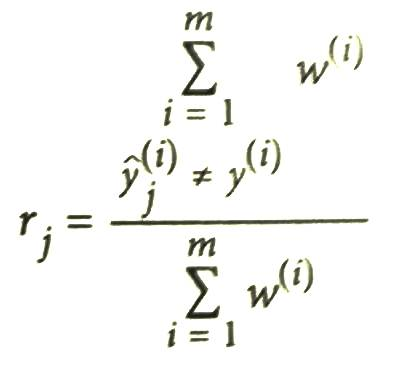

###  2. Predictor  Weight (alpha) : 
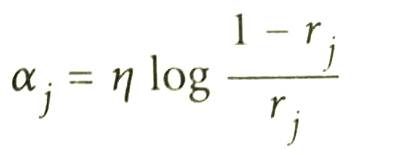
##### Where, n=learning rate

### 3.  Weight Update Rule: 
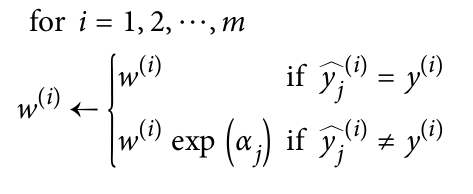

### 4. Prediction:
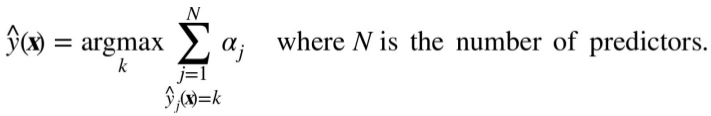

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Plotting of alpha:

Text(0, 0.5, 'alpha')

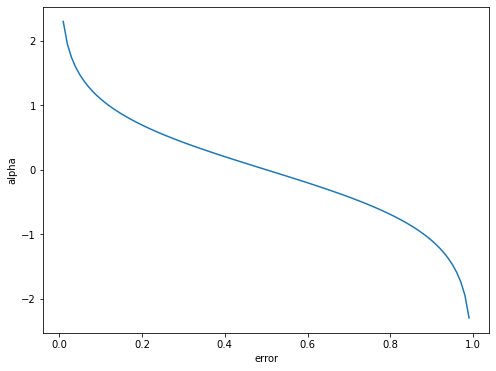

In [2]:
alpha=lambda x: 0.5*np.log((1-x)/x) # Learning rate = 0.5 is taken. 
error=np.arange(0.01,1,0.01)
plt.figure(figsize=(8,6))
plt.plot(error,alpha(error))
plt.xlabel('error')
plt.ylabel('alpha')

### Training Steps:

####  Generating a hypothetical data Set

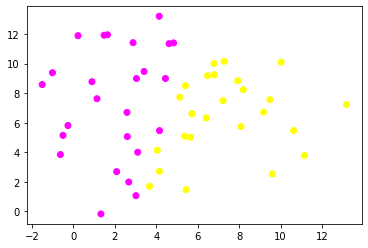

In [3]:
from sklearn.datasets import make_blobs
(X,y) =  make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=2.55,random_state=20)
plt.scatter(X[:,0],X[:,1],marker='o',c=y,cmap='spring')
plt.show()

In [4]:
## These two values will be  used for testing prediction function
print(X[4,:],y[4])
print(X[40,:],y[40])

[-0.25702679  5.80623633] 0
[ 7.27047873 10.15041485] 1


### Role of sample weight in Decision Tree Classifier ' fit ' Methods :
* sample_weight augments the probability estimates in the probability array ... which augments the impurity measure ... which augments how nodes are split ... which augments how the tree is built ... which augments how feature space is diced up for classification.
* Specifically, in the probability estimates, training examples are  counted  equivalent to its corresponding weight we have provided.

In [5]:
from sklearn.tree import DecisionTreeClassifier
def AdaBoost_scratch(X,y, M=10, learning_rate = 1):
    #Initialization of variables
    N = len(y)  # Sample size
    estimator_list=[]
    y_predict_list=[]
    estimator_error_list=[]
    estimator_weight_list=[]
    sample_weight_list = []
    
    #Initialize the sample weights
    sample_weight = np.ones(N) / N # Before  Eqn (1)
    sample_weight_list.append(sample_weight.copy())
    
    #For m = 1 to M , number of stumps/weak learners
    for m in range(M):
        
        #Fit a classifier
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2) # First predictor
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        #Misclassifications
        incorrect = (y_predict != y)
        sign=np.where(incorrect==True,1,-1) ## added Check

        #   Weighted Error or Estimator Eqn (1) second part 
        estimator_error = np.average(incorrect, weights=sample_weight, axis=0)
        
        # Predictor weight, alpha  Eqn (2)
        estimator_weight =  learning_rate * np.log((1. - estimator_error) / estimator_error)

        # Weight update  Eqn (3)
        sample_weight *= np.exp(estimator_weight * incorrect *sign) ## Added Check
        
        #Save iteration values
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        

    #Convert to np array for convenience   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)
    
    # Predictions Eqn (4) 
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

In [6]:
estimator_list, estimator_weight_list, sample_weight_list=AdaBoost_scratch(X,y, M=10, learning_rate =0.005)
## You may have to tune M, and learning_rate to get better accuracy.Give a Try:

Accuracy =  0.94


In [7]:
len(estimator_list)

10

In [8]:
estimator_weight_list

array([0.01375768, 0.01368889, 0.01362044, 0.01355234, 0.01348458,
       0.01341716, 0.01335007, 0.01328332, 0.0132169 , 0.01315082])

In [32]:
#sample_weight_list

#### Making Prediction Function

In [10]:
def AdaBoost_Predict(x_temp, est,est_weights ):
        '''Return classification prediction for a given point X and a previously fitted AdaBoost
         Pass data point X in 2D array format  '''
        temp_pred = np.asarray( [ (e.predict(x_temp)).T* w for e, w in zip(est,est_weights )]  ) / est_weights.sum()
        return np.sign(temp_pred.sum(axis = 0))

In [11]:
AdaBoost_Predict(np.array([X[4,:],X[40,:]]), estimator_list,estimator_weight_list ) 

array([0., 1.])

### Plotting the decision Boundary

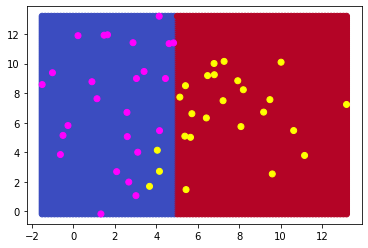

In [12]:
x_axis=np.linspace(np.min(X[:,0]),np.max(X[:,0]),100) #
y_axis=np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
xx,yy=np.meshgrid(x_axis,y_axis)
data=np.c_[xx.ravel(),yy.ravel()]
class_y=AdaBoost_Predict(data, estimator_list,estimator_weight_list)
plt.scatter(xx.ravel(),yy.ravel(),c=class_y,cmap='coolwarm')
plt.scatter(X[:,0],X[:,1],c=y,cmap='spring')

In [13]:
np.unique(class_y)

array([0., 1.])

### Modification in Adaboost for Multiclass Classification
#### SAMME — Stagewise Additive Modeling using a Multi-class Exponential loss function
* When k = 2, it becoms Adaboost, where k is the number of class

In [14]:
from sklearn.tree import DecisionTreeClassifier
def AdaBoost_MultiClass(X,y, M=10, learning_rate = 1):
    #Initialization of utility variables
    N = len(y)
    k=len(np.unique(y))
    estimator_list=[]
    y_predict_list=[]
    estimator_error_list=[]
    estimator_weight_list=[]
    sample_weight_list = []
    
    #Initialize the sample weights
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())
    
    #For m = 1 to M
    for m in range(M):
        
        #Fit a classifier
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        #Misclassifications
        incorrect = (y_predict != y)
        sign=np.where(incorrect==True,1,-1)

      
        estimator_error =np.mean(np.average(incorrect, weights=sample_weight, axis=0)) 
        estimator_weight =  learning_rate *(np.log((1. - estimator_error) / estimator_error) + np.log(k-1))
        ## Last term in above equation is added extra to previously Adaboost Algo 
        sample_weight *= np.exp(estimator_weight*incorrect*sign) 
        
        #Save iteration values
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        

    #Convert to np array for convenience   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)
    
    #Predictions
    preds =[] 
    for i in range(N):
        classes,count= np.unique(y_predict_list[:,i],return_counts=True)
        preds.append(classes[np.argmax(count)])
    
    print('Accuracy = ', np.equal(np.array(preds),y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

## Trying on iris data

In [17]:
data=pd.read_csv('iris.csv')
data.head()
X_label = data.iloc[:,[1,3]].values
y_data = data['Name'].values

In [18]:
from sklearn.preprocessing import LabelEncoder  # Encoding library call
enc = LabelEncoder()
## for example encoding y_train
label_encoder_y = enc.fit(y_data)
y_label = label_encoder_y.transform(y_data)
y_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
estimator_list, estimator_weight_list, sample_weight_list=AdaBoost_MultiClass(X_label,y_label, M=100, learning_rate =0.5)

Accuracy =  0.96


### Making function for prediction

In [20]:
def AdaBoost_Multi_class_Predict(x_temp, est,est_weights ):
        '''Return classification prediction for a given point X and a previously fitted AdaBoost
         Pass data point X in 2D array format  '''
        temp_pred = np.asarray( [ (e.predict(x_temp)).T for e in est ])
        preds=[]
        for i in range(len(x_temp)):
            classes,count= np.unique(temp_pred[:,i],return_counts=True)
            preds.append(classes[np.argmax(count)])
        return np.array(preds)

In [21]:
AdaBoost_Multi_class_Predict(X_label, estimator_list,estimator_weight_list )

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Adaboost in Sklearn
### Using Initially generated hypothetical Dataset

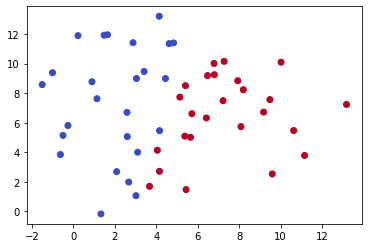

In [22]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm')
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html --> options for color mapping 

#### Sklearn AdaBoost and decision boundary

In [23]:
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style('white')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [24]:
boost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=10, learning_rate=1.0)
boost.fit(X,y)
boost.score(X,y)

1.0

In [25]:
boost.predict(X)

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0])

##### Making Decision Boundary

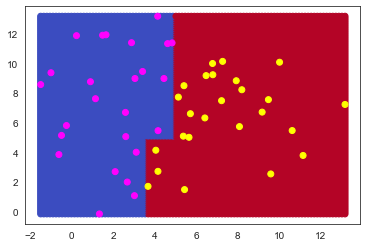

In [31]:
x_axis=np.linspace(np.min(X[:,0]),np.max(X[:,0]),100) #
y_axis=np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
xx,yy=np.meshgrid(x_axis,y_axis)
data=np.c_[xx.ravel(),yy.ravel()]
class_y=boost.predict(data)
plt.scatter(xx.ravel(),yy.ravel(),c=class_y,cmap='coolwarm')
plt.scatter(X[:,0],X[:,1],c=y,cmap='spring')

#### Thank You ! This much for this Module !!
#### Don't don't forget to follow me for more such stuff. 
#### https://www.linkedin.com/in/ramendra-kumar-57334478/
#### https://github.com/Rami-RK